In [19]:
import cv2
import scipy
import time
import numpy as np
import scipy.signal
import scipy.ndimage
import matplotlib.pyplot as plt

In [ ]:
# parameters
image_size = (512,512)
radius = 20
color = (255,255,255)
center = image_size[0]//2, image_size[1]//2

fps = 30  # frames per second
video_lenght = 10 # in seconds
num_frames = fps*video_lenght

amplitude = 0.5 # amplitude of sine wave
freq = 10 # in Hz the current freq with this factor



In [166]:
# write the function so that it's not out of the bound of the image size
def func(x,y, nframe):
    """Given the current location of the circle, give the next location, 

    Args:
        x (int): current x location of the circle
        y (int): current y location of the circle
        nframe (int): current frame

    Returns:
        (nx,ny): Returns next new x and y location for the circle
    """
    global amplitude, center, freq
    

    nx = x
    ny = y
    if nx<image_size[0]-1 and ny<image_size[1]-1:
        nx = int(np.floor(np.sin(nframe * 2*np.pi/fps * freq )*amplitude)) + center[0]
        # 2*np.pi/fps convert the (freq) into freq for this video
    else:
        nx = 0
    
    assert nx<image_size[0] and ny<image_size[1], "Out put not within "
    
    return nx, ny

In [167]:
frames = []
current_location = center
nxl = []

for i in range(num_frames):
    frame = np.zeros(image_size)
    
    func_value = func(current_location[0], current_location[1], i) # give (x, y) co-ordinates for the circle
    circle_position = (func_value[0], func_value[1])
    nxl.append(circle_position[0])
    circle_frame = cv2.circle(frame, circle_position, radius, color, thickness=-1)
    
    frames.append(circle_frame)
    
    current_location = circle_position # update the current location
    
    

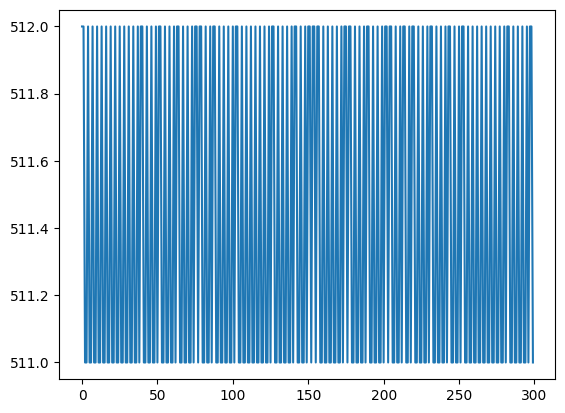

In [168]:
plt.plot(nxl)

In [169]:
# display
for frame in frames:
    cv2.imshow('Circle Function',frame)
    if cv2.waitKey(fps)==ord('q'):
        break

cv2.destroyAllWindows()



In [ ]:
# save
timestmap = time.strftime("%Y_%b_%d_%Hh_%Mm_%Ss")
output_path = f"tests/results/generated/func_circle_{timestmap}_{fps}fs_{amplitude}amp_{freq}hz.mp4"
out = cv2.VideoWriter(output_path,
                          cv2.VideoWriter_fourcc(*'MP4V'), 
                          int(np.round(fps)), 
                          image_size,
                          False
                          )
    
for f in frames:
    # cv2.imshow("Frame",f)
    # if cv2.waitKey(fps)==ord('q'):
    #     break
    out.write(f.astype(np.uint8))

# cv2.destroyAllWindows()
out.release()
